In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
etf = pd.read_csv("Data/ETF.csv", index_col=0, parse_dates=True).pct_change(fill_method=None)["2007":]
              # ["VTI", "TLT", "SHY", "GLD", "GSG", "VNQ"]
etf.columns = ["Stock","","ShortTerm","Gold","Commodity","Real-Estate"]

In [31]:
rolling_corr = etf.rolling(window=252).corr()
rolling_corr_drop = rolling_corr.dropna()
rolling_corr_drop

Stock  Bond_20+   Bond_1+      Gold  Commodity   
at                                                                          
2008-01-02 Stock        1.000000 -0.354992 -0.010107  0.234606   0.342760  \
           Bond_20+    -0.354992  1.000000  0.817604  0.702955   0.562171   
           Bond_1+     -0.010107  0.817604  1.000000  0.896425   0.865987   
           Gold         0.234606  0.702955  0.896425  1.000000   0.949992   
           Commodity    0.342760  0.562171  0.865987  0.949992   1.000000   
...                          ...       ...       ...       ...        ...   
2023-05-01 Bond_20+     0.397465  1.000000  0.916787  0.171993   0.525687   
           Bond_1+      0.370394  0.916787  1.000000  0.297370   0.572520   
           Gold         0.468264  0.171993  0.297370  1.000000  -0.197011   
           Commodity    0.033009  0.525687  0.572520 -0.197011   1.000000   
           Real-Estate  0.610924  0.822693  0.713661 -0.019802   0.606194   

                        Real-Estate  
at                                   
2008-01-02 Stock          -0.146710  
           Bond_20+       -0.350305  
           Bond_1+        -0.729669  
           Gold           -0.623330  
           Commodity      -0.767221  
...                             ...  
2023-05-01 Bond_20+        0.822693  
           Bond_1+         0.713661  
           Gold           -0.019802  
           Commodity       0.606194  
           Real-Estate     1.000000  

[23154 rows x 6 columns]

In [32]:
corr_values = rolling_corr_drop.loc[:, ("Stock","Bond_20+","Bond_1+")]  #('VTI', 'TLT',"SHY")
corr_matrix = corr_values.unstack()

In [33]:
corr_matrix_T = corr_matrix.T
corr_matrix_T

at                    2008-01-02  2008-01-03  2008-01-04  2008-01-07   
Stock    Bond_1+       -0.010107   -0.021976   -0.041448   -0.061457  \
         Bond_20+      -0.354992   -0.358296   -0.366645   -0.376353   
         Commodity      0.342760    0.326202    0.300190    0.277249   
         Gold           0.234606    0.216594    0.189049    0.160417   
         Real-Estate   -0.146710   -0.135900   -0.114499   -0.095462   
         Stock          1.000000    1.000000    1.000000    1.000000   
Bond_20+ Bond_1+        0.817604    0.823126    0.829077    0.834740   
         Bond_20+       1.000000    1.000000    1.000000    1.000000   
         Commodity      0.562171    0.574272    0.588072    0.599102   
         Gold           0.702955    0.712998    0.724217    0.735840   
         Real-Estate   -0.350305   -0.363680   -0.379006   -0.393367   
         Stock         -0.354992   -0.358296   -0.366645   -0.376353   
Bond_1+  Bond_1+        1.000000    1.000000    1.000000    1.000000   
         Bond_20+       0.817604    0.823126    0.829077    0.834740   
         Commodity      0.865987    0.868634    0.871974    0.874017   
         Gold           0.896425    0.898429    0.901098    0.903737   
         Real-Estate   -0.729669   -0.734636   -0.740545   -0.746200   
         Stock         -0.010107   -0.021976   -0.041448   -0.061457   

at                    2008-01-08  2008-01-09  2008-01-10  2008-01-11   
Stock    Bond_1+       -0.086729   -0.107927   -0.126867   -0.148908  \
         Bond_20+      -0.388748   -0.399180   -0.407328   -0.418365   
         Commodity      0.247164    0.221202    0.198509    0.174747   
         Gold           0.123636    0.092644    0.062929    0.031563   
         Real-Estate   -0.068512   -0.046281   -0.026784   -0.004961   
         Stock          1.000000    1.000000    1.000000    1.000000   
Bond_20+ Bond_1+        0.840636    0.846195    0.850021    0.853944   
         Bond_20+       1.000000    1.000000    1.000000    1.000000   
         Commodity      0.611087    0.622867    0.632183    0.640875   
         Gold           0.747345    0.758277    0.765498    0.772824   
         Real-Estate   -0.408375   -0.422592   -0.432714   -0.443568   
         Stock         -0.388748   -0.399180   -0.407328   -0.418365   
Bond_1+  Bond_1+        1.000000    1.000000    1.000000    1.000000   
         Bond_20+       0.840636    0.846195    0.850021    0.853944   
         Commodity      0.876444    0.878873    0.881079    0.882782   
         Gold           0.906275    0.908569    0.910437    0.912799   
         Real-Estate   -0.752513   -0.757796   -0.762354   -0.766948   
         Stock         -0.086729   -0.107927   -0.126867   -0.148908   

at                    2008-01-14  2008-01-15  ...  2023-04-18  2023-04-19   
Stock    Bond_1+       -0.167250   -0.191705  ...    0.434727    0.424807  \
         Bond_20+      -0.428202   -0.443475  ...    0.495068    0.483673   
         Commodity      0.154265    0.128814  ...    0.148547    0.131459   
         Gold           0.006023   -0.025527  ...    0.497745    0.491535   
         Real-Estate    0.013341    0.039968  ...    0.725131    0.712999   
         Stock          1.000000    1.000000  ...    1.000000    1.000000   
Bond_20+ Bond_1+        0.857726    0.862113  ...    0.926825    0.925791   
         Bond_20+       1.000000    1.000000  ...    1.000000    1.000000   
         Commodity      0.648798    0.656959  ...    0.552823    0.548733   
         Gold           0.778829    0.786417  ...    0.273764    0.258533   
         Real-Estate   -0.454326   -0.467582  ...    0.842606    0.841114   
         Stock         -0.428202   -0.443475  ...    0.495068    0.483673   
Bond_1+  Bond_1+        1.000000    1.000000  ...    1.000000    1.000000   
         Bond_20+       0.857726    0.862113  ...    0.926825    0.925791   
         Commodity      0.884500    0.886011  ...    0.617613    0.613418   
         Gold           0.9146

In [35]:
# 자기자신과의 corr은 1이기 때문에 Drop
corr_matrix_T_drop = corr_matrix_T.drop([("Stock","Stock"),        #("VTI","VTI"),
                                         ("Bond_20+","Bond_20+"),    #("TLT","TLT"),
                                         ("Bond_1+","Bond_1+")])   #("SHY","SHY")
corr_matrix_T_drop

at                    2008-01-02  2008-01-03  2008-01-04  2008-01-07   
Stock    Bond_1+       -0.010107   -0.021976   -0.041448   -0.061457  \
         Bond_20+      -0.354992   -0.358296   -0.366645   -0.376353   
         Commodity      0.342760    0.326202    0.300190    0.277249   
         Gold           0.234606    0.216594    0.189049    0.160417   
         Real-Estate   -0.146710   -0.135900   -0.114499   -0.095462   
Bond_20+ Bond_1+        0.817604    0.823126    0.829077    0.834740   
         Commodity      0.562171    0.574272    0.588072    0.599102   
         Gold           0.702955    0.712998    0.724217    0.735840   
         Real-Estate   -0.350305   -0.363680   -0.379006   -0.393367   
         Stock         -0.354992   -0.358296   -0.366645   -0.376353   
Bond_1+  Bond_20+       0.817604    0.823126    0.829077    0.834740   
         Commodity      0.865987    0.868634    0.871974    0.874017   
         Gold           0.896425    0.898429    0.901098    0.903737   
         Real-Estate   -0.729669   -0.734636   -0.740545   -0.746200   
         Stock         -0.010107   -0.021976   -0.041448   -0.061457   

at                    2008-01-08  2008-01-09  2008-01-10  2008-01-11   
Stock    Bond_1+       -0.086729   -0.107927   -0.126867   -0.148908  \
         Bond_20+      -0.388748   -0.399180   -0.407328   -0.418365   
         Commodity      0.247164    0.221202    0.198509    0.174747   
         Gold           0.123636    0.092644    0.062929    0.031563   
         Real-Estate   -0.068512   -0.046281   -0.026784   -0.004961   
Bond_20+ Bond_1+        0.840636    0.846195    0.850021    0.853944   
         Commodity      0.611087    0.622867    0.632183    0.640875   
         Gold           0.747345    0.758277    0.765498    0.772824   
         Real-Estate   -0.408375   -0.422592   -0.432714   -0.443568   
         Stock         -0.388748   -0.399180   -0.407328   -0.418365   
Bond_1+  Bond_20+       0.840636    0.846195    0.850021    0.853944   
         Commodity      0.876444    0.878873    0.881079    0.882782   
         Gold           0.906275    0.908569    0.910437    0.912799   
         Real-Estate   -0.752513   -0.757796   -0.762354   -0.766948   
         Stock         -0.086729   -0.107927   -0.126867   -0.148908   

at                    2008-01-14  2008-01-15  ...  2023-04-18  2023-04-19   
Stock    Bond_1+       -0.167250   -0.191705  ...    0.434727    0.424807  \
         Bond_20+      -0.428202   -0.443475  ...    0.495068    0.483673   
         Commodity      0.154265    0.128814  ...    0.148547    0.131459   
         Gold           0.006023   -0.025527  ...    0.497745    0.491535   
         Real-Estate    0.013341    0.039968  ...    0.725131    0.712999   
Bond_20+ Bond_1+        0.857726    0.862113  ...    0.926825    0.925791   
         Commodity      0.648798    0.656959  ...    0.552823    0.548733   
         Gold           0.778829    0.786417  ...    0.273764    0.258533   
         Real-Estate   -0.454326   -0.467582  ...    0.842606    0.841114   
         Stock         -0.428202   -0.443475  ...    0.495068    0.483673   
Bond_1+  Bond_20+       0.857726    0.862113  ...    0.926825    0.925791   
         Commodity      0.884500    0.886011  ...    0.617613    0.613418   
         Gold           0.914611    0.916790  ...    0.348021    0.336792   
         Real-Estate   -0.771375   -0.776093  ...    0.745467    0.742122   
         Stock         -0.167250   -0.191705  ...    0.434727    0.424807   

at                    2023-04-20  2023-04-21  2023-04-24  2023-04-25   
Stock    Bond_1+        0.417260    0.408539    0.401902    0.396884  \
         Bond_20+       0.473406    0.459071    0.446743    0.438538   
         Commodity      0.117098    0.101506    0.086952    0.078108   
         Gold           0.486430    0.480724    0.475954    0.470633   
         Real-Estate    0.697975    0.680813    0.664610    0.654288   
Bond_20+ Bond_1+        0.924

In [36]:
# ("TLT","VTI"), ("SHY","VTI"), ("SHY","TLT")는 두번 포함되기 때문에 드랍
corr_matrix_T_drop2 = corr_matrix_T_drop.drop([("Bond_20+","Stock"),  #("TLT","VTI"),
                                               ("Bond_1+","Stock"),  #("SHY","VTI"),
                                               ("Bond_1+","Bond_20+")]) #("SHY","TLT")
corr_matrix_T_drop2

at                    2008-01-02  2008-01-03  2008-01-04  2008-01-07   
Stock    Bond_1+       -0.010107   -0.021976   -0.041448   -0.061457  \
         Bond_20+      -0.354992   -0.358296   -0.366645   -0.376353   
         Commodity      0.342760    0.326202    0.300190    0.277249   
         Gold           0.234606    0.216594    0.189049    0.160417   
         Real-Estate   -0.146710   -0.135900   -0.114499   -0.095462   
Bond_20+ Bond_1+        0.817604    0.823126    0.829077    0.834740   
         Commodity      0.562171    0.574272    0.588072    0.599102   
         Gold           0.702955    0.712998    0.724217    0.735840   
         Real-Estate   -0.350305   -0.363680   -0.379006   -0.393367   
Bond_1+  Commodity      0.865987    0.868634    0.871974    0.874017   
         Gold           0.896425    0.898429    0.901098    0.903737   
         Real-Estate   -0.729669   -0.734636   -0.740545   -0.746200   

at                    2008-01-08  2008-01-09  2008-01-10  2008-01-11   
Stock    Bond_1+       -0.086729   -0.107927   -0.126867   -0.148908  \
         Bond_20+      -0.388748   -0.399180   -0.407328   -0.418365   
         Commodity      0.247164    0.221202    0.198509    0.174747   
         Gold           0.123636    0.092644    0.062929    0.031563   
         Real-Estate   -0.068512   -0.046281   -0.026784   -0.004961   
Bond_20+ Bond_1+        0.840636    0.846195    0.850021    0.853944   
         Commodity      0.611087    0.622867    0.632183    0.640875   
         Gold           0.747345    0.758277    0.765498    0.772824   
         Real-Estate   -0.408375   -0.422592   -0.432714   -0.443568   
Bond_1+  Commodity      0.876444    0.878873    0.881079    0.882782   
         Gold           0.906275    0.908569    0.910437    0.912799   
         Real-Estate   -0.752513   -0.757796   -0.762354   -0.766948   

at                    2008-01-14  2008-01-15  ...  2023-04-18  2023-04-19   
Stock    Bond_1+       -0.167250   -0.191705  ...    0.434727    0.424807  \
         Bond_20+      -0.428202   -0.443475  ...    0.495068    0.483673   
         Commodity      0.154265    0.128814  ...    0.148547    0.131459   
         Gold           0.006023   -0.025527  ...    0.497745    0.491535   
         Real-Estate    0.013341    0.039968  ...    0.725131    0.712999   
Bond_20+ Bond_1+        0.857726    0.862113  ...    0.926825    0.925791   
         Commodity      0.648798    0.656959  ...    0.552823    0.548733   
         Gold           0.778829    0.786417  ...    0.273764    0.258533   
         Real-Estate   -0.454326   -0.467582  ...    0.842606    0.841114   
Bond_1+  Commodity      0.884500    0.886011  ...    0.617613    0.613418   
         Gold           0.914611    0.916790  ...    0.348021    0.336792   
         Real-Estate   -0.771375   -0.776093  ...    0.745467    0.742122   

at                    2023-04-20  2023-04-21  2023-04-24  2023-04-25   
Stock    Bond_1+        0.417260    0.408539    0.401902    0.396884  \
         Bond_20+       0.473406    0.459071    0.446743    0.438538   
         Commodity      0.117098    0.101506    0.086952    0.078108   
         Gold           0.486430    0.480724    0.475954    0.470633   
         Real-Estate    0.697975    0.680813    0.664610    0.654288   
Bond_20+ Bond_1+        0.924727    0.923832    0.923251    0.922135   
         Commodity      0.546270    0.543549    0.540276    0.537125   
         Gold           0.246104    0.231678    0.219045    0.209433   
         Real-Estate    0.840699    0.839156    0.837737    0.835202   
Bond_1+  Commodity      0.609503    0.605596    0.601624    0.595310   
         Gold           0.329546    0.321657    0.315492    0.312870   
         Real-Estate    0.739785    0.738066    0.737039    0.732674   

at                    2023-04-26  2023-04-27  2023-04-28  2023-05-01  
Stock    Bond_1+        0.390116    0.384748    0.379573    0.370394  
         Bond_20+       0.428408    0.419785 

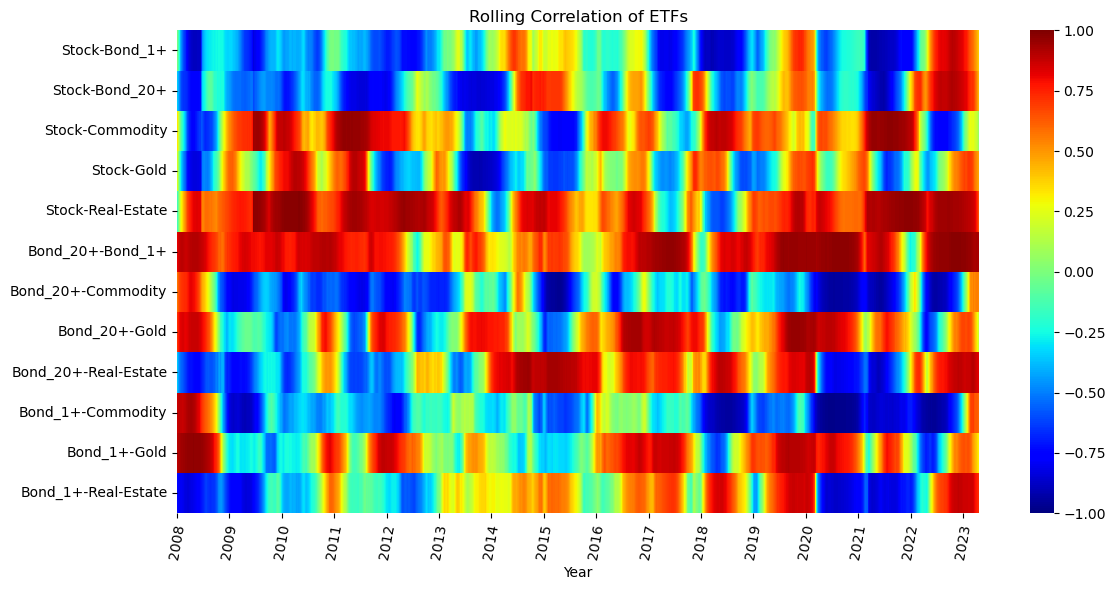

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix_T_drop2, 
            cmap="jet",
            vmin=-1,
            vmax=1)

plt.title("Rolling Correlation of ETFs")
plt.xticks(rotation="80", 
           ticks=np.arange(0,252*16,252), # 1년에는 주식이 보통 252일 열린다
           labels=["2008", "2009","2010","2011","2012","2013",
                   "2014","2015","2016","2017","2018","2019",
                   "2020","2021","2022","2023"])
plt.xlabel("Year")
plt.ylabel(None)
plt.tight_layout();